**Irfan Musa** <br>
**PYTN-KS11-019**

Lakukan metode statistik kepada dataset, seperti Central Tendencies, Intervals, Hypotesis testing, dan semua metode statistik yang telah kamu pelajari.

# A. Import Library

Import library-library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
import statistics
import scipy.stats
from IPython.display import Math, Latex
%matplotlib inline

# B. Data Understanding
Data understanding merupakan sebuah tahapan yang bertujuan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan yang diberikan.

# C. Data Collection
Data collection atau pengumpulan data merupakan prosedur mengumpulkan, mengukur, dan menganalisis berbagai tipe informasi menggunakan teknik yang berstandar.

In [2]:
#upload dataset
df_nyc = pd.read_csv('nyc-rolling-sales.csv')
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**Penjelasan terkait data** <br> This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below. <br>
<br> Sumber data : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

# D. Data Exploration
Data exploration merupakan pendekatan yang mirip dengan analisis data awal yang meliputi memeriksa jumlah data, tipe data, dan statistika.

In [3]:
df_nyc.shape #Melihat jumlah baris dan kolom dari data

(84548, 22)

In [4]:
df_nyc.info() #Melihat tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
df_nyc.describe() #Melihat penjelasan singkat secara statistik dari data

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


# E. PreProcessing Data
Data preprocessing merupakan proses yang mengubah data mentah ke dalam bentuk yang lebih mudah dipahami.

In [6]:
#Mengubah nama kolom menjadi lower case
df_nyc.columns = map(str.lower, df_nyc.columns)
df_nyc.head()

,unnamed: 0,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,...,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**Mengubah index pada kolom sesuai keinginan** <br>
Index pada kolom borough diubah menjadi seperti berikut.
- 1 = Manhattan
- 2 = Bronx
- 3 = Brooklyn
- 4 = Queens
- 5 = Staten Island

In [7]:
df_nyc['borough'] = df_nyc.borough.replace({1:"Manhattan", 2:"Bronx", 3:"Brooklyn", 4:"Queens", 5:"Staten Island"})
df_nyc.head()

,unnamed: 0,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,...,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**Hapus kolom yang sekiranya tidak diperlukan**

In [8]:
df_nyc.drop(['unnamed: 0','tax class at present','block','lot','ease-ment','building class at present','address'], axis=1, inplace=True)
df_nyc

,borough,neighborhood,building class category,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [9]:
df_nyc.drop(['apartment number','zip code','tax class at time of sale','building class at time of sale'], axis=1, inplace=True)
df_nyc

,borough,neighborhood,building class category,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633,6440,1900,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,28,3,31,4616,18690,1900,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,16,1,17,2212,7803,1900,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272,6794,1913,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6,0,6,2369,4615,1900,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,2,0,2,2400,2575,1998,450000,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,2,0,2,2498,2377,1998,550000,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,2,0,2,4000,1496,1925,460000,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,0,7,7,208033,64117,2001,11693337,2016-12-21 00:00:00


# F. Data cleaning
Data cleaning merupakan proses menyiapkan data dengan cara menghapus atau memodifikasi data yang salah, tidak relevan, tidak akurat, duplikat, maupun yang tidak terformat.

In [10]:
#Cek adanya nilai Nan pada data
df_nyc.isna().sum()

borough                    0
neighborhood               0
building class category    0
residential units          0
commercial units           0
total units                0
land square feet           0
gross square feet          0
year built                 0
sale price                 0
sale date                  0
dtype: int64

In [11]:
#Cek adakah data yang terduplikat
df_nyc.duplicated().sum()

2827

In [12]:
#Cek data dtype
df_nyc.dtypes

borough                    object
neighborhood               object
building class category    object
residential units           int64
commercial units            int64
total units                 int64
land square feet           object
gross square feet          object
year built                  int64
sale price                 object
sale date                  object
dtype: object

Diperhatikan bahwa ada beberapa data type yang sedikit tidak sesuai, yaitu :
- data type Sale date akan diubah menjadi date time
- data type land square feet, gross square feet, dan sale price akan diubah menjadi int64

In [13]:
df_nyc['sale date'] = pd.to_datetime(df_nyc['sale date'])
cols_to_convert = ['land square feet','gross square feet','sale price']
for col in cols_to_convert:
    df_nyc[col] = pd.to_numeric(df_nyc[col], errors='coerce').fillna(0).astype('int64')
print(df_nyc.dtypes)

borough                            object
neighborhood                       object
building class category            object
residential units                   int64
commercial units                    int64
total units                         int64
land square feet                    int64
gross square feet                   int64
year built                          int64
sale price                          int64
sale date                  datetime64[ns]
dtype: object


# Measure of Central Tendency
- Mean <br>
Mean merupakan nilai rata-rata dari sebuah data.
- Median <br>
Median merupakan nilai tengah dari data setelah diurutkan dari terkecil ke terbesar. <br>
- Modus/mode <br>
Modus merupakan nilai yang paling banyak mucul dalam sebuah data.

In [14]:
a = df_nyc.iloc[0:, 3:5]
a

,residential units,commercial units
0,5,0
1,28,3
2,16,1
3,10,0
4,6,0
...,...,...
84543,2,0
84544,2,0
84545,2,0
84546,0,7


Pada dataset yang diberikan, diambil data pada kolom 'residential units' dan 'commercial units'. Selanjutnya, data tersebut dikelompokkan sendiri untuk ditemukan nilai mean, median, dan modusnya.

In [15]:
a_1 = a.iloc[:, :1]
a_2 = a.iloc[:, 1:]
print(a_1)
print(a_2)

       residential units
0                      5
1                     28
2                     16
3                     10
4                      6
...                  ...
84543                  2
84544                  2
84545                  2
84546                  0
84547                  0

[84548 rows x 1 columns]
       commercial units
0                     0
1                     3
2                     1
3                     0
4                     0
...                 ...
84543                 0
84544                 0
84545                 0
84546                 7
84547                 1

[84548 rows x 1 columns]


In [16]:
a_11 = np.mean(a_1)
a_21 = np.mean(a_2)

print(a_11)
print(a_21)

residential units    2.025264
dtype: float64
commercial units    0.193559
dtype: float64


C:\Users\Axioo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [17]:
a_12 = np.median(a_1)
a_22 = np.median(a_2)

print(a_12)
print(a_22)

1.0
0.0


In [18]:
a_13 = scipy.stats.mode(a_1)
a_23 = scipy.stats.mode(a_2)

print(a_13)
print(a_23)

ModeResult(mode=array([[1]], dtype=int64), count=array([[34722]]))
ModeResult(mode=array([[0]], dtype=int64), count=array([[79429]]))


C:\Users\Axioo\AppData\Local\Temp\ipykernel_6812\3972545045.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  a_13 = scipy.stats.mode(a_1)
C:\Users\Axioo\AppData\Local\Temp\ipykernel_6812\3972545045.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  a_23 = scip

Dengan demikian, diperoleh persebaran data sebagai berikut.
- Residential unit <br>
Residential unit memiliki jumlah data unit terbanyak pada jumlah $1$ unit dengan jumlah data tersebut sebanyak $34722$ buah, memiliki nilai tengah dari data pada nilai $1$ unit, dan memiliki nilai rata-rata $2.025264 \approx 2$. <br>
- Commercial unit <br>
Commercial unit memiliki jumlah data unit terbanyak pada jumlah $0$ unit dengan jumlah data tersebut sebanyak $79429$ buah, memiliki nilai tengah dari data pada nilai $0$ unit, dan memiliki nilai rata-rata $ 0.193559 \approx 0$.

# Measure of Spread
- Range
Range merupakan jarak antara nilai terbesar dengan nilai terkecil pada sebuah data.
- Standard deviasi
Standar deviasi merupakan pengukuran jarak rata-rata, memiliki nama lain berupa simpangan baku, dan biasa disimbolkan dengan $\sigma$.
- Variansi
Variansi merupakan kuadrat dari jarak rata-rata atau dengan kata lain kuadrat dari standar deviasi sehingga dapat disimbolkan dengan $\sigma^{2}$.

In [19]:
a_1 = a.iloc[:, :1]
a_2 = a.iloc[:, 1:]
print(a_1)
print(a_2)

       residential units
0                      5
1                     28
2                     16
3                     10
4                      6
...                  ...
84543                  2
84544                  2
84545                  2
84546                  0
84547                  0

[84548 rows x 1 columns]
       commercial units
0                     0
1                     3
2                     1
3                     0
4                     0
...                 ...
84543                 0
84544                 0
84545                 0
84546                 7
84547                 1

[84548 rows x 1 columns]


Panggil kembali variabel a_1 dan a_2 dengan tujuan agar data tersebut digunakan dalam pencarian range, standar deviasi, dan variansinya.

In [20]:
b_11 = a_1.min()
b_12 = a_1.max()
b_13 = b_12 - b_11

print('Range dari', b_13)

Range dari residential units    1844
dtype: int64


In [21]:
b_14 = np.std(a_1,ddof=1)
b_15 = np.var(a_1,ddof=1)

print('Standar deviasi', b_14)
print('Variansi', b_15)

Standar deviasi residential units    16.721037
dtype: float64
Variansi residential units    279.593079
dtype: float64


In [22]:
b_21 = a_2.min()
b_22 = a_2.max()
b_23 = b_22 - b_21

print('Range dari', b_23)

Range dari commercial units    2261
dtype: int64


In [23]:
b_24 = np.std(a_2,ddof=1)
b_25 = np.var(a_2,ddof=1)

print('Standar deviasi', b_24)
print('Variansi', b_25)

Standar deviasi commercial units    8.713183
dtype: float64
Variansi commercial units    75.919564
dtype: float64


Dengan demikian, diperoleh persebaran data sebagai berikut.
- Residential unit <br>
Residential unit memiliki range data sebesar $1844$ unit dengan jumlah standar deviasi data tersebut ialah senilai $16.721037$, sehingga memiliki nilai variansi sejumlah $279.593079$. <br>
- Commercial unit <br>
Commercial unit memiliki range data sebesar $2261$ unit dengan jumlah standar deviasi data tersebut ialah senilai $8.713183$, sehingga memiliki nilai variansi sejumlah $75.919564$.

# Probability Distribution

- Uniform Distribution <br>
Rumus fungsi data berdistribusi uniform sebagai berikut. <br>
$f(x) = \begin{cases}
\frac{1}{b-a}, \hspace{0.4cm} a \leq x \leq b \\
0, \hspace{0.7cm} other.
\end{cases}$

C:\Users\Axioo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


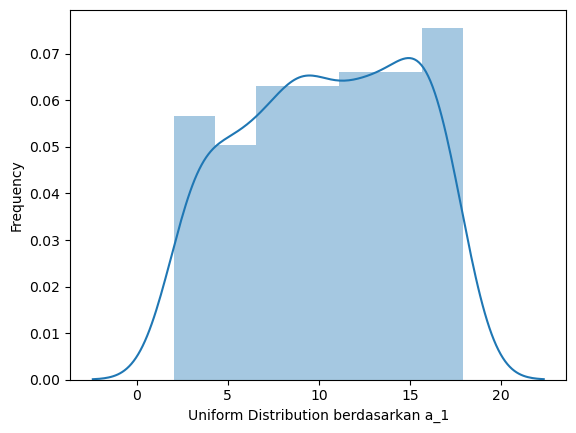

In [24]:
from scipy.stats import uniform
c_1 = uniform.rvs(size=280, loc=2, scale=16)
sns.distplot(c_1)
plt.xlabel('Uniform Distribution berdasarkan a_1')
plt.ylabel('Frequency')
plt.show()

Argumen loc sesuai dengan mean $(\mu)$, scale sesuai dengan standard deviasi $(\sigma)$, dan size jumlah variasi acak.

- Normal Distribution <br> 
Rumus fungsi data berdistribusi normal sebagai berikut. <br>
$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$.

C:\Users\Axioo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Normal Distribution berdasarkan a_1', ylabel='Frequency'>

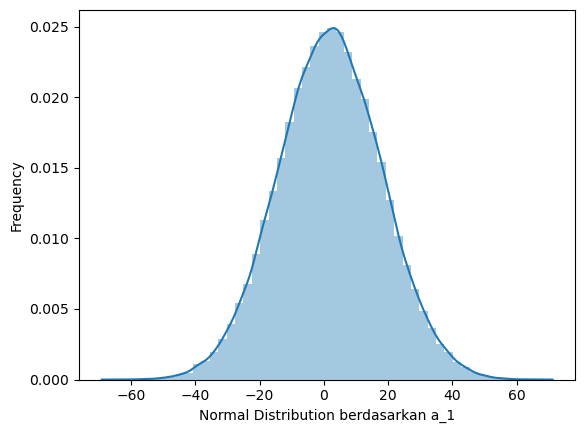

In [25]:
from scipy.stats import norm
c_2 = norm.rvs(size=84548,loc=2,scale=16)
plt.xlabel('Normal Distribution berdasarkan a_1')
plt.ylabel('Frequency')
sns.distplot(c_2)

Argumen loc sesuai dengan mean $(\mu)$, scale sesuai dengan standard deviasi $(\sigma)$, dan size jumlah variasi acak.

- Gamma Distribution dan Exponential Distribution <br>
Rumus fungsi data berdistribusi gamma sebagai berikut. <br>
$f(x) = \frac{x^{a-1}}{\beta^{a}\Gamma(a)}e^{-\frac{x}{\beta}}$.

C:\Users\Axioo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gamma Distribution berdasarkan a_1', ylabel='Frequency'>

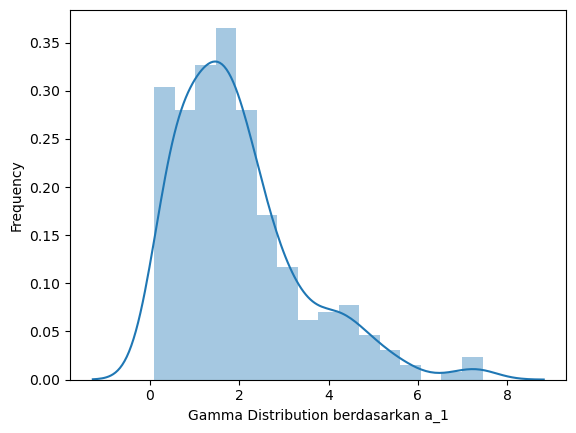

In [26]:
from scipy.stats import gamma
c_3 = gamma.rvs(size=280,a=2)
plt.xlabel('Gamma Distribution berdasarkan a_1')
plt.ylabel('Frequency')
sns.distplot(c_3)

Pada percobaan diatas diambil a = 2 sebagai puncak distribusi. <br>
Diperhatikan bahwa $\Gamma(a) = (a-1)!$ merupakan fungsi gamma sehingga apabila a = 1, akan menghasilkan fungsi berdistribusi eksponensial.

C:\Users\Axioo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exponential Distribution berdasarkan a_1', ylabel='Frequency'>

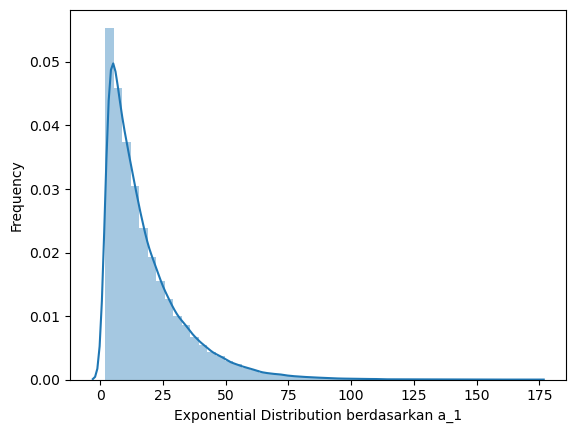

In [27]:
from scipy.stats import expon
c_4 = expon.rvs(size=84548,loc=2,scale=16)
plt.xlabel('Exponential Distribution berdasarkan a_1')
plt.ylabel('Frequency')
sns.distplot(c_4)

Argumen loc sesuai dengan mean $(\mu)$ distribusi, scale sesuai dengan standard deviasi $(\sigma)$, dan size jumlah variasi acak.

- Possion Distribution <br>
Rumus probabilitas data berdistribusi poisson sebagai berikut. <br>
$p(x) = P(X=x) = \frac{e^{-\lambda}\lambda^{x}}{x!}$ <br> dengan
<br>
X = 0,1,2... <br>
$\mu = \lambda$ <br>
$\sigma = \sqrt{\lambda}$

C:\Users\Axioo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Poisson Distribution berdasarkan a_1', ylabel='Frequency'>

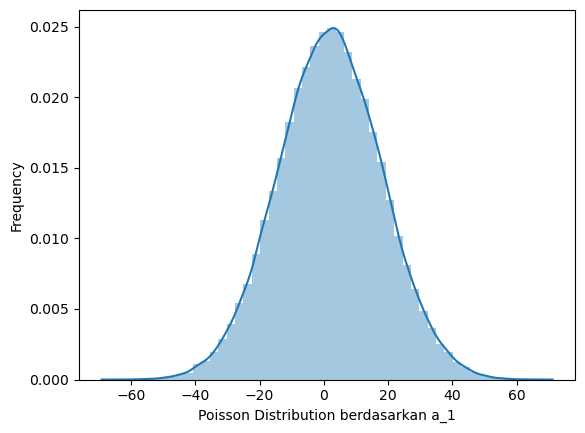

In [28]:
from scipy.stats import poisson
c_5 = poisson.rvs(size=84548,mu=280)
plt.xlabel('Poisson Distribution berdasarkan a_1')
plt.ylabel('Frequency')
sns.distplot(c_2)

Berdasarkan rumus diatas, diperoleh bahwa $\mu = \lambda = \sigma^{2}$

- Binomial Distribution <br>
Rumus peluang data berdistribusi binomial sebagai berikut. <br>
$f(x) = \frac{n!}{(n-x)!}p^{x}q^{n-x}$ <br>
<br>
dengan <br>
n = jumlah percobaan <br>
p = peluang sukses <br>
q = peluang gagal

In [29]:
c_6 = df_nyc.iloc[0:, 1:2]
print(c_6)

        neighborhood
0      ALPHABET CITY
1      ALPHABET CITY
2      ALPHABET CITY
3      ALPHABET CITY
4      ALPHABET CITY
...              ...
84543        WOODROW
84544        WOODROW
84545        WOODROW
84546        WOODROW
84547        WOODROW

[84548 rows x 1 columns]


Akan ditunjukkan Binomial distribution berdasarkan data wilayah diatas.

In [30]:
c_61 = scipy.stats.mode(c_6)
print(c_61)
p = 26736/84548
print(p)

C:\Users\Axioo\AppData\Local\Temp\ipykernel_6812\344254119.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  c_61 = scipy.stats.mode(c_6)


ModeResult(mode=array([['FLUSHING-NORTH']], dtype=object), count=array([[3068]]))
0.3162227373799498


C:\Users\Axioo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\Axioo\AppData\Local\Temp\ipykernel_6812\344254119.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  c_61 = scipy.stats.mode(c_6)


Data distribusi yang akan ditunjukkan ialah berdasarkan kemunculan data Queens.

C:\Users\Axioo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Binomial Distribution berdasarkan c_6', ylabel='Frequency'>

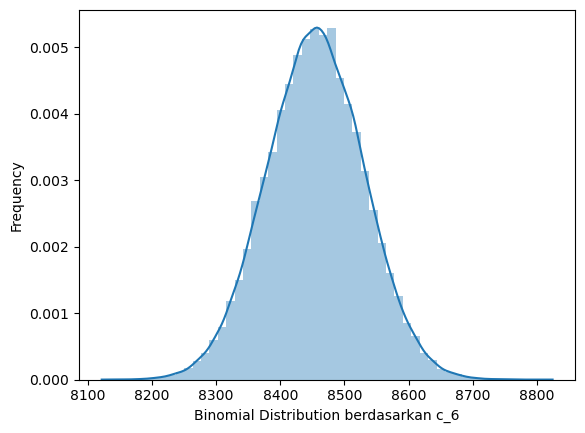

In [31]:
from scipy.stats import binom
c_62 = binom.rvs(n = 26736,p=0.31622647758051736, size=84548)
plt.xlabel('Binomial Distribution berdasarkan c_6')
plt.ylabel('Frequency')
sns.distplot(c_62)

Berdasarkan data wilayah, ditunjukkan distribusi Queens muncul. Parameter-parameter yang digunakan sebagai berikut. <br>
n = jumlah data queens mucul (jumlah total percobaan) <br> size = jumlah keseluruhan data <br> p = probabilitas data Queens muncul $\frac{n}{size}$.

- Bernoulli Distribution <br>
Bernoulli distribution hanya memiliki dua kemungkinan hasil, yaitu berhasil (1) dan gagal (0).

C:\Users\Axioo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

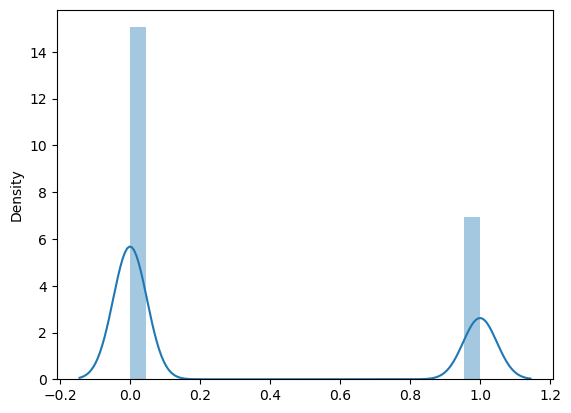

In [32]:
from scipy.stats import bernoulli
c_7 = bernoulli.rvs(size=84548,p=0.31622647758051736)
sns.distplot(c_7)

Parameter-parameter yang digunakan sebagai berikut.
- size = jumlah keseluruhan data
- p = probabilitas data queens muncul

# Confidence intervals

Confidence interval = $\mu \pm (z-score \times ste)$ <br> dengan
ste = $\sqrt{\frac{p(1-p)}{n}}$. <br>
Berikut parameter-parameter yang digunakan.
- $\mu$ = rata-rata
- z-score = nilai z
- ste = standar eror
- p = probabilitas data ($\frac{x}{n}$)
- x = jumlah data yang muncul
- n = jumlah keseluruhan data <br>

Selanjutnya, akan ditunjukkan confidence interval berdasarkan data wilayah Brooklyn yang memiliki tahun dibangun 1925.

In [33]:
df_nyc['borough'].value_counts().head()

Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: borough, dtype: int64

In [34]:
#Jumlah data wilayah = Manhattan dan kelas pajak = 2
d_1 = df_nyc[(df_nyc['borough']=='Brooklyn') & (df_nyc['year built']== 1925)]
d_1.shape

(1577, 11)

In [35]:
# menghitung standar error
n = 24047
x = 1577
p = x/n
ste = np.sqrt (p*(1-p)/n)
print('Diperoleh nilai standar error = ', ste)

Diperoleh nilai standar error =  0.0015963423221811808


In [36]:
z_score = 1.96
lcb = p - (z_score*ste)
ucb = p + (z_score*ste)
print('Diperoleh lower limit of the CI = ', lcb)
print('Diperoleh upper limit of the CI =', ucb)

Diperoleh lower limit of the CI =  0.06245107506590752
Diperoleh upper limit of the CI = 0.06870873696885775


Berdasarkan perhitungan diatas, diperoleh hasil sebagai berikut. <br>
Confidence interval = $\mu \pm (z-score \times ste)$ <br>
- $\mu + (z-score \times ste) = 0.8315317851637011 $
- $\mu - (z-score \times ste) = 0.8422363782799785 $

# Hypothesis Testing

- One Population Proportion <br>
Kuantitas yang digunakan untuk menafsirkan hasil tes dengan menerima atau menolak hipotesis awal $(H_0)$.

In [40]:
e

,borough,neighborhood,building class category,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633,6440,1900,6625000,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,28,3,31,4616,18690,1900,0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,16,1,17,2212,7803,1900,0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272,6794,1913,3936272,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6,0,6,2369,4615,1900,8000000,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...
18301,Manhattan,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,0,1,1,1260,1080,1990,0,2016-11-16
18302,Manhattan,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,0,0,0,13000,0,0,7500000,2016-11-01
18303,Manhattan,WASHINGTON HEIGHTS UPPER,33 EDUCATIONAL FACILITIES,0,1,1,29775,253942,1969,0,2017-04-21
18304,Manhattan,WASHINGTON HEIGHTS UPPER,33 EDUCATIONAL FACILITIES,0,1,1,25875,140260,1967,0,2017-04-21


In [37]:
e = df_nyc[df_nyc['borough']=='Manhattan']
print(e.shape)
f = df_nyc[df_nyc['borough']=='Bronx']
print(f.shape)

(18306, 11)
(7049, 11)


Berdasarkan data yang diambil, dipilih hipotesis awal, yaitu rata-rata total unit di Manhattan > rata-rata total unit di Bronx. <br>
- $H_0 : \mu_{e} > \mu_{f}$
- $H_1 : \mu_{e} \leq \mu_{f}$.

In [42]:
e_1 = e.iloc[:,5:6]
print(e_1)
f_1 = f.iloc[:, 5:6]
print(f_1)

       total units
0                5
1               31
2               17
3               10
4                6
...            ...
18301            1
18302            0
18303            1
18304            1
18305            1

[18306 rows x 1 columns]
       total units
18306            1
18307            1
18308            1
18309            1
18310            1
...            ...
25350            0
25351            0
25352            2
25353            2
25354            1

[7049 rows x 1 columns]


In [43]:
e_2 = np.mean(e_1)
e_3 = np.std(e_1,ddof=1)
print('rata-rata',e_2)
print('standar deviasi',e_3)
f_2 = np.mean(f_1)
f_3 = np.std(f_1,ddof=1)
print('rata-rata',f_2)
print('standar deviasi',f_3)

rata-rata total units    2.649623
dtype: float64
standar deviasi total units    23.307873
dtype: float64
rata-rata total units    3.603774
dtype: float64
standar deviasi total units    24.000651
dtype: float64


C:\Users\Axioo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Berdasarkan hasil yang diperoleh, didapati bahwa rata-rata total units di wilayah Manhattan ialah $2.649623$ dan rata-rata total units di bronx ialah $3.603774$. Dengan demikian, diperoleh bahwa $2.649623$ < $3.603774$. Artinya, hipotesis awal ditolak.

**Overall Analysis**
- Residential unit memiliki jumlah data unit terbanyak pada jumlah $1$ unit dengan jumlah data tersebut sebanyak $34722$ buah, memiliki nilai tengah dari data pada nilai $1$ unit, memiliki range data sebesar $1844$ unit dengan jumlah standar deviasi data tersebut ialah senilai $16.721037$, sehingga memiliki nilai variansi sejumlah $279.593079$, dan memiliki nilai rata-rata $2.025264 \approx 2$.
- Commercial unit memiliki jumlah data unit terbanyak pada jumlah $0$ unit dengan jumlah data tersebut sebanyak $79429$ buah, memiliki nilai tengah dari data pada nilai $0$ unit, memiliki range data sebesar $2261$ unit dengan jumlah standar deviasi data tersebut ialah senilai $8.713183$, sehingga memiliki nilai variansi sejumlah $75.919564$, dan memiliki nilai rata-rata $ 0.193559 \approx 0$.
- Data unit di wiliayah Manhatta yang memiliki kelas pajak '2' memiliki nilai confidence interval dari $0.8315317851637011 \approx 83.1$% sampai $0.8422363782799785 \approx 84.2$%. <br>
- rata-rata total unit di Manhattan $\leq$ rata-rata total unit di Bronx.